In [10]:
import numpy as np

from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA

from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQC


In [ ]:
#pip install qiskit qiskit-aer qiskit-machine-learning

In [11]:
X = np.array([
    [0.0, 0.0],
    [np.pi, np.pi]
])

y = np.array([0, 1])



In [12]:
sampler = Sampler(options={"shots": 1024})  #Local Aer simulator (default)



C:\Users\DELL\AppData\Local\Temp\ipykernel_56424\2115006624.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler(options={"shots": 1024})


In [21]:
#Feature map (data encoding)
feature_map = ZZFeatureMap(
    feature_dimension=2,
    reps=1
)


In [22]:
#Ansatz (trainable circuit)
ansatz = RealAmplitudes(
    num_qubits=2,
    reps=1
)


In [15]:
#Classical optimizer
optimizer = COBYLA(maxiter=50)


In [16]:
#Create the Variational Quantum Classifier (VQC)
#A Variational Quantum Classifier is a model that:Maps classical data into a quantum state, applies a trainable unitary transformation, 
#measures probabilities, and optimizes the transformation to separate classes.
#VQC learns how to rotate and entangle quantum states so that measurements separate data classes with high probability.
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer
)


In [17]:
#Train the quantum model
vqc.fit(X, y)


In [18]:
#Make predictions
predictions = vqc.predict(X)
accuracy = vqc.score(X, y)

print("Predictions:", predictions)
print("Accuracy:", accuracy)


Predictions: [1 1]
Accuracy: 0.5


Feature Map Circuit:
     ┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘
Ansatz Circuit:


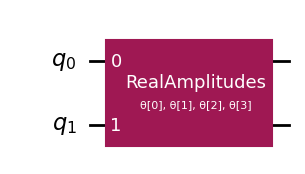

In [20]:
print("Feature Map Circuit:")
print(feature_map.draw())

print("Ansatz Circuit:")
display(ansatz.draw("mpl"))
